In [1]:
# Sklearn RadomForest on CNY data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle as pkl

In [4]:
dset = pd.read_csv('dset.csv', sep = ';')

In [54]:
%%time
# RandomForest with GridSeacrh model init and fit
X = dset[['RChange', 'CChange', 'CRatio', 'RRatio', 'RVol', 'CVol']]
y = dset['Pred']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
cv_params = {'max_depth': [3,4,5,6, None], 
             'min_samples_leaf': [2,3,4,5,6,7,8],
             'min_samples_split': [2,3],
             'max_features': [1,2,3,4,5,6],
             'n_estimators': [80, 100, 140]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_cv = GridSearchCV(rf_model, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='accuracy')
rf_cv.fit(X_train, y_train)

CPU times: total: 5.94 s
Wall time: 1min 12s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3],
                         'n_estimators': [80, 100, 140]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [55]:
#See best params
rf_cv.best_params_

{'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 80}

In [56]:
#See best accuracy
rf_cv.best_score_

0.621415607985481

In [57]:
#Display other scores function
def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean accuracy score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_accuracy'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = f'F1: {f1}, Recall: {recall}, Precision: {precision}, Accuracy: {accuracy}'
 
    return table

In [58]:
#View other scores
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

'F1: 0.66122925960578, Recall: 0.6944086021505376, Precision: 0.6342258874438839, Accuracy: 0.621415607985481'

In [59]:
#Try to predict on random new data
new_data = pd.read_csv('set2.csv', sep = ';')
test_n = new_data[['RChange', 'CChange', 'CRatio', 'RRatio', 'RVol', 'CVol']]
new_predictions = rf_cv.predict(test_n)
new_data['Predict'] = new_predictions
new_data = new_data.iloc[:,1:]
new_data.head(10)

,RChange,CChange,CRatio,RRatio,RVol,CVol,Predict
0,0.097912,0.064835,0.867974,0.893333,0.747648,0.839382,0
1,1.370946,1.447178,1.363598,1.581685,1.315552,1.287942,1
2,0.371233,0.502299,0.839068,0.925267,0.755774,0.829114,1
3,1.273699,0.992486,0.990809,0.856494,1.532907,1.281375,1
4,-1.173699,-0.792486,0.690809,0.756494,1.932907,1.381375,0
5,-2.273699,-2.592486,0.590809,0.656494,1.032907,1.081375,0


In [60]:
# New df for feature importance
dset1 = dset.iloc[:,1:]
dset1 = dset1.drop(['RES', 'Pred'], axis=1)

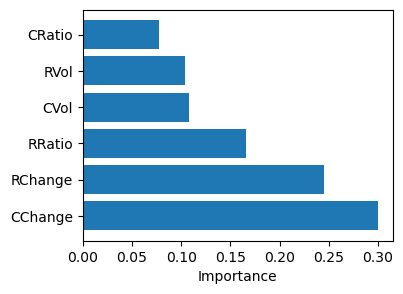

In [61]:
# Feature Importance research
best_rf_model = rf_cv.best_estimator_
f_imp = best_rf_model.feature_importances_
var_names = dset1.columns
f_imp_df = pd.DataFrame({
    'Feature': var_names,
    'Importance': f_imp
})

f_imp_df = f_imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(4, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.show()

In [64]:
# Save to file
filename = 'randf1.sav'
pkl.dump(best_rf_model, open(filename, 'wb'))

In [62]:
# Test on X_test
y_pred = best_rf_model.predict(X_test)

In [63]:
#Scores
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)


pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)


rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)


f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.5972222222222222
precision score: 0.625
recall score: 0.6410256410256411
f1 score: 0.6329113924050633
